# Proyecto 1
## Security Data Science
* César Rodas 16776
* Mario Andrés Perdomo 

### Librerías

In [2]:
import pandas as pd
import numpy as np
%matplotlib agg
import matplotlib.pyplot as plt
import seaborn as sns

#!{sys.executable} -m pip install pandas_profiling
!pip install pandas_profiling
!pip install sklearn
import pandas_profiling as pp
from pandas_profiling import ProfileReport

import sklearn
from sklearn import metrics, model_selection, tree

from urllib.parse import urlparse

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


C:\Users\cesarvin\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Parte 2

### Separación de datos

In [3]:
df = pd.read_csv('clean_train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8588801 entries, 0 to 8588800
Data columns (total 50 columns):
 #   Column                                             Dtype
---  ------                                             -----
 0   ProductName                                        int64
 1   IsBeta                                             int64
 2   RtpStateBitfield                                   int64
 3   IsSxsPassiveMode                                   int64
 4   AVProductStatesIdentifier                          int64
 5   AVProductsInstalled                                int64
 6   AVProductsEnabled                                  int64
 7   HasTpm                                             int64
 8   CountryIdentifier                                  int64
 9   GeoNameIdentifier                                  int64
 10  LocaleEnglishNameIdentifier                        int64
 11  Platform                                           int64
 12  Processor     

In [5]:
df.head(10)

,ProductName,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,GeoNameIdentifier,...,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,HasDetections
0,0,0,7,0,53447,1,1,1,29,35,...,0,0,0,0,0,0,0,0,0,0
1,0,0,7,0,53447,1,1,1,93,119,...,0,2,0,1,0,0,0,0,0,0
2,0,0,7,0,53447,1,1,1,86,64,...,0,0,3,0,0,0,0,0,0,0
3,0,0,7,0,53447,1,1,1,88,117,...,0,0,3,0,0,0,0,0,0,1
4,0,0,7,0,53447,1,1,1,18,277,...,0,0,0,0,0,0,0,0,0,1
5,0,0,7,0,53447,1,1,1,97,126,...,0,0,0,0,0,0,0,0,0,1
6,0,0,7,0,43927,2,1,1,78,89,...,0,0,0,0,1,0,0,0,0,1
7,0,0,7,0,53447,1,1,1,97,126,...,0,0,0,0,0,0,0,0,0,0
8,0,0,7,0,53447,1,1,1,164,205,...,0,0,0,0,0,0,0,0,0,0
9,0,0,7,0,53447,1,1,1,107,138,...,0,0,0,0,0,0,1,1,1,0


In [6]:
target = df['HasDetections']
feature = df.drop(['HasDetections'], axis=1)

** Separamos en dos el dataset train 70% test 30%**

In [7]:
feature_train, feature_test, target_train, target_test = model_selection.train_test_split(feature, target, test_size=0.3, random_state=1)

** Separamos nuevamente el train para obtener train 55% validacion 15%**

In [8]:
feature_train, feature_validate, target_train, target_validate = model_selection.train_test_split(feature_train, target_train, test_size=0.15, random_state=1)

In [9]:
feature_train.count()

ProductName                                          5110336
IsBeta                                               5110336
RtpStateBitfield                                     5110336
IsSxsPassiveMode                                     5110336
AVProductStatesIdentifier                            5110336
AVProductsInstalled                                  5110336
AVProductsEnabled                                    5110336
HasTpm                                               5110336
CountryIdentifier                                    5110336
GeoNameIdentifier                                    5110336
LocaleEnglishNameIdentifier                          5110336
Platform                                             5110336
Processor                                            5110336
OsBuild                                              5110336
OsSuite                                              5110336
OsPlatformSubRelease                                 5110336
SkuEdition              

In [10]:
feature_test.count()

ProductName                                          2576641
IsBeta                                               2576641
RtpStateBitfield                                     2576641
IsSxsPassiveMode                                     2576641
AVProductStatesIdentifier                            2576641
AVProductsInstalled                                  2576641
AVProductsEnabled                                    2576641
HasTpm                                               2576641
CountryIdentifier                                    2576641
GeoNameIdentifier                                    2576641
LocaleEnglishNameIdentifier                          2576641
Platform                                             2576641
Processor                                            2576641
OsBuild                                              2576641
OsSuite                                              2576641
OsPlatformSubRelease                                 2576641
SkuEdition              

In [11]:
feature_validate.count()

ProductName                                          901824
IsBeta                                               901824
RtpStateBitfield                                     901824
IsSxsPassiveMode                                     901824
AVProductStatesIdentifier                            901824
AVProductsInstalled                                  901824
AVProductsEnabled                                    901824
HasTpm                                               901824
CountryIdentifier                                    901824
GeoNameIdentifier                                    901824
LocaleEnglishNameIdentifier                          901824
Platform                                             901824
Processor                                            901824
OsBuild                                              901824
OsSuite                                              901824
OsPlatformSubRelease                                 901824
SkuEdition                              

## MODELOS

### Implementación Random Forest Classifier

In [28]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf = RandomForestClassifier(n_estimators=100)

In [26]:
clf.fit(feature_train,target_train)

RandomForestClassifier()

In [27]:
fetaure_pred=clf.predict(feature_test)

In [29]:
print('accuracy score \n',accuracy_score(target_test, fetaure_pred))

accuracy score 
 0.6035901004447263


In [30]:
print('Matriz de confusion \n',confusion_matrix(target_test, target_pred))


Matriz de confusion 
 [[1289369       0]
 [1287272       0]]


In [31]:
print(classification_report(target_test, fetaure_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60   1289369
           1       0.60      0.60      0.60   1287272

    accuracy                           0.60   2576641
   macro avg       0.60      0.60      0.60   2576641
weighted avg       0.60      0.60      0.60   2576641



In [32]:
target_prob = clf.predict_proba(feature_test)

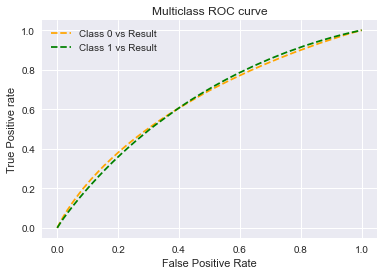

In [35]:
plt.style.use('seaborn')
%matplotlib inline
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(target_test, target_prob[:, i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Result')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Result')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('LR Multiclass ROC',dpi=900); 